In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("perrin-freres-monthly-champagne-.csv")

In [51]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [52]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [53]:
data.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [54]:
data = data.drop([105,106],axis=0)

In [55]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [56]:
data.columns=["Month","Sales"]

In [57]:
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [58]:
data['Month']=pd.to_datetime(data['Month'])

In [59]:
data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [60]:
data = data.set_index('Month')

In [61]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


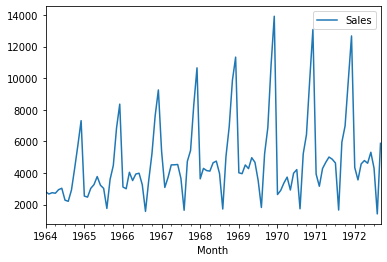

In [62]:
data.plot()

Rolling statistics test

In [63]:
rolmean = data.rolling(window=12).mean()

rolstd = data.rolling(window=12).std()

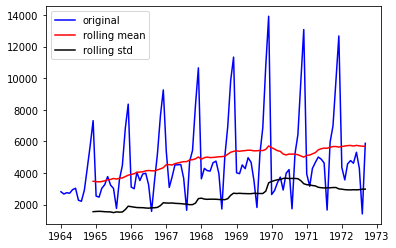

In [65]:
orig = plt.plot(data,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label="rolling mean")
std = plt.plot(rolstd,color='black',label="rolling std")
plt.legend()
plt.show()

ADF

## Augumented Dickey Fuller Test

In [66]:
from statsmodels.tsa.stattools import adfuller

<b>Ho: It is non stationary

H1: It is stationary 

In [67]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Accept alternate hypothesis. Reject the null hypothesis")
    else:
        print("Accept Null. Reject Alternate ")
    

In [68]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
Accept Null. Reject Alternate 


In [69]:
data.head(36)

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
1964-06-01,3036.0
1964-07-01,2282.0
1964-08-01,2212.0
1964-09-01,2922.0


In [70]:
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(12)

In [71]:
data.head(20)

,Sales,Seasonal First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [73]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
Accept alternate hypothesis. Reject the null hypothesis


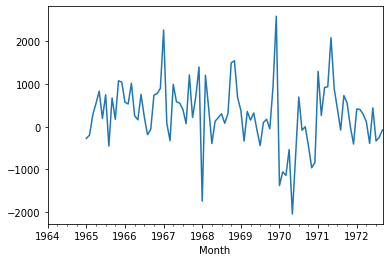

In [72]:
data['Seasonal First Difference'].plot()